## Project
## Dataset: Facebook Live sellers in Thailand
## Agenda:
### Mini project based on KMeans and using K-means++ on the Live Dataset, and form the Clusters.

In [1]:
# Import the Libaray
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
# Dataset
data=pd.read_csv("C:/Users/Lenovo/Desktop/Semester- III/ML Data Set/Live.csv")
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
# Here, we count the all nulls 
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [4]:
# Here, we Delete blanks columns
del data['Column1']
del data['Column2']
del data['Column3']
del data['Column4']

In [5]:
# Imformtion about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [6]:
# Seperate the year and month
data['year']=pd.DatetimeIndex(data['status_published']).year
data['month']=pd.DatetimeIndex(data['status_published']).month

In [7]:
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,2018,4
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,2018,4
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,2018,4
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,2018,4
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,2016,9
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,2016,9
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,2016,9
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,2016,9


In [8]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
 12  year              7050 non-null   int64 
 13  month             7050 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 771.2+ KB


In [10]:
# String convert into int
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['status_type'] = le.fit_transform(data['status_type'])
y = le.transform(data['status_type'])

In [11]:
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month
0,246675545449582_1649696485147474,3,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,2018,4
1,246675545449582_1649426988507757,1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,2018,4
2,246675545449582_1648730588577397,3,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,2018,4
3,246675545449582_1648576705259452,1,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,2018,4
4,246675545449582_1645700502213739,1,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,1,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,2016,9
7046,1050855161656896_1061334757275603,1,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,2016,9
7047,1050855161656896_1060126464063099,1,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,2016,9
7048,1050855161656896_1058663487542730,1,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,2016,9


In [12]:
# Now, we try to make the cluster using different features
# 4= num_comments and 5= num_shares
x=data.iloc[:,[4,5]].values
x

array([[512, 262],
       [  0,   0],
       [236,  57],
       ...,
       [  0,   0],
       [ 12,  22],
       [  0,   0]], dtype=int64)

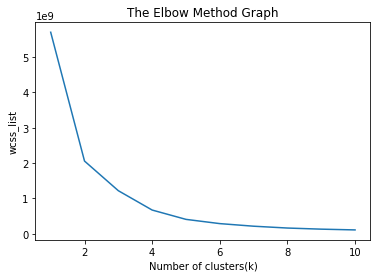

In [13]:
from sklearn.cluster import KMeans
# we have created the wcss list
# wcss is a interia 
wcss_list=[] # Initializing the list for the value of WCSS
#hutte
# kmeans.inertia_: sum of squared distance
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [14]:
# Elbow point 
from kneed import KneeLocator
k1=KneeLocator(range(1,11),wcss_list,curve='convex',direction='decreasing')
k1.elbow

3

In [15]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=1)
# We are going to use the fit predict method that return for each observation which cluster
y_predict=kmeans.fit_predict(x)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

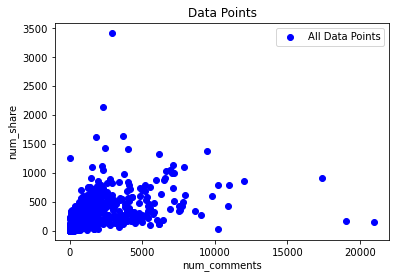

In [16]:
plt.scatter(x[:,0],x[:,1],c='blue',label='All Data Points')
plt.title('Data Points')
plt.xlabel('num_comments')
plt.ylabel('num_share')
plt.legend()
plt.show()

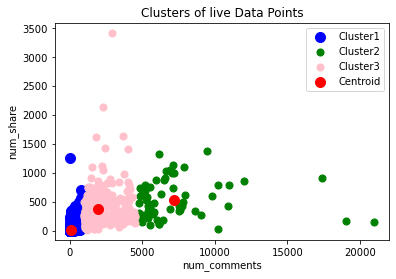

In [17]:
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=100,c='blue',label='Cluster1')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=50,c='green',label='Cluster2')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=50,c='pink',label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroid')
plt.title('Clusters of live Data Points')
plt.xlabel('num_comments')
plt.ylabel('num_share')
plt.legend()
plt.show()

In [18]:
# 5=num_shares, 6= num_likes
y=data.iloc[:,[5,6]].values
y

array([[262, 432],
       [  0, 150],
       [ 57, 204],
       ...,
       [  0,   1],
       [ 22, 349],
       [  0,  17]], dtype=int64)

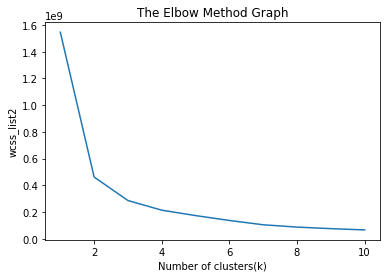

In [19]:
from sklearn.cluster import KMeans
# we have created the wcss list
# wcss is a interia 
wcss_list2=[] # Initializing the list for the value of WCSS
#hutte
# kmeans.inertia_: sum of squared distance
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(y)
    wcss_list2.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list2)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list2')
plt.show()

In [20]:
# This is Elbow point
from kneed import KneeLocator
k2=KneeLocator(range(1,11),wcss_list2,curve='convex',direction='decreasing')
k2.elbow

3

In [21]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=1)
# We are going to use the fit predict method that return for each observation which cluster
y_predict2=kmeans.fit_predict(y)
y_predict2

array([2, 2, 2, ..., 2, 2, 2])

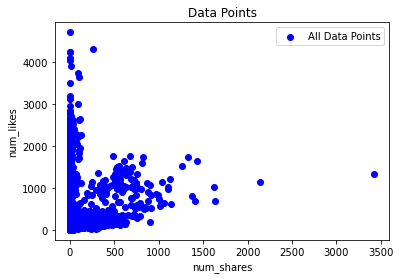

In [22]:
# Scatter plot 
plt.scatter(y[:,0],y[:,1],c='blue',label='All Data Points')
plt.title('Data Points')
plt.xlabel('num_shares')
plt.ylabel('num_likes')
plt.legend()
plt.show()

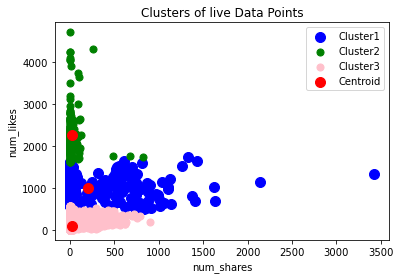

In [23]:
# Here, we plot the Cluster and Centroid 
plt.scatter(y[y_predict2==0,0],y[y_predict2==0,1],s=100,c='blue',label='Cluster1')
plt.scatter(y[y_predict2==1,0],y[y_predict2==1,1],s=50,c='green',label='Cluster2')
plt.scatter(y[y_predict2==2,0],y[y_predict2==2,1],s=50,c='pink',label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroid')
plt.title('Clusters of live Data Points')
plt.xlabel('num_shares')
plt.ylabel('num_likes')
plt.legend()
plt.show()

In [24]:
# 7= num_likes , 11= num_loves
z=data.iloc[:,[6,7]].values
z

array([[432,  92],
       [150,   0],
       [204,  21],
       ...,
       [  1,   1],
       [349,   2],
       [ 17,   0]], dtype=int64)

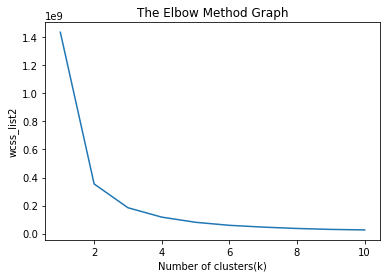

In [25]:
from sklearn.cluster import KMeans
# we have created the wcss list
# wcss is a interia 
wcss_list3=[] # Initializing the list for the value of WCSS
#hutte
# kmeans.inertia_: sum of squared distance
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(z)
    wcss_list3.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list3)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list2')
plt.show()

In [26]:
# This is the Elbow point
from kneed import KneeLocator
k3=KneeLocator(range(1,11),wcss_list2,curve='convex',direction='decreasing')
k3.elbow

3

In [27]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=1)
# We are going to use the fit predict method that return for each observation which cluster
y_predict3=kmeans.fit_predict(z)
y_predict3

array([0, 0, 0, ..., 0, 0, 0])

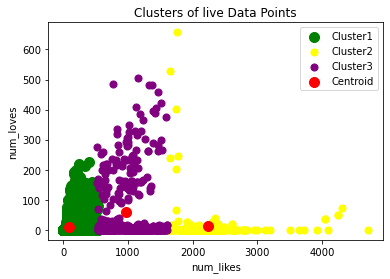

In [28]:
# Here, we plot the Cluster and Centroid 
plt.scatter(z[y_predict3==0,0],z[y_predict3==0,1],s=100,c='green',label='Cluster1')
plt.scatter(z[y_predict3==1,0],z[y_predict3==1,1],s=50,c='yellow',label='Cluster2')
plt.scatter(z[y_predict3==2,0],z[y_predict3==2,1],s=50,c='purple',label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroid')
plt.title('Clusters of live Data Points')
plt.xlabel('num_likes')
plt.ylabel('num_loves')
plt.legend()
plt.show()

In [29]:
# 11= num_angrys and 4= num_comments
s=data.iloc[:,[11,4]].values
s

array([[  0, 512],
       [  0,   0],
       [  0, 236],
       ...,
       [  0,   0],
       [  0,  12],
       [  0,   0]], dtype=int64)

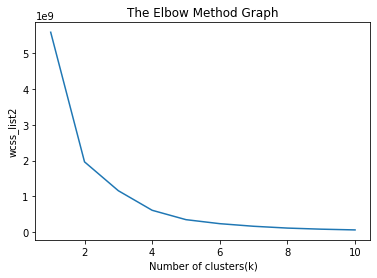

In [30]:
from sklearn.cluster import KMeans
# we have created the wcss list
# wcss is a interia 
wcss_list2=[] # Initializing the list for the value of WCSS
#hutte
# kmeans.inertia_: sum of squared distance
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(s)
    wcss_list2.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list2)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list2')
plt.show()

In [31]:
# This is the Elbow point
from kneed import KneeLocator
k4=KneeLocator(range(1,11),wcss_list2,curve='convex',direction='decreasing')
k4.elbow

3

In [32]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=1)
# We are going to use the fit predict method that return for each observation which cluster
y_predict4=kmeans.fit_predict(s)
y_predict4

array([0, 0, 0, ..., 0, 0, 0])

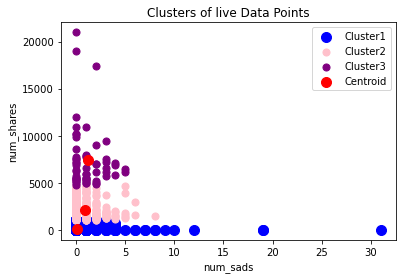

In [33]:
# Here, we plot the Cluster and Centroid 
plt.scatter(s[y_predict4==0,0],s[y_predict4==0,1],s=100,c='blue',label='Cluster1')
plt.scatter(s[y_predict4==1,0],s[y_predict4==1,1],s=50,c='pink',label='Cluster2')
plt.scatter(s[y_predict4==2,0],s[y_predict4==2,1],s=50,c='purple',label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroid')
plt.title('Clusters of live Data Points')
plt.xlabel('num_sads')
plt.ylabel('num_shares')
plt.legend()
plt.show()

In [34]:
# 3= num_reaction and 4= num_comments
q=data.iloc[:,[3,4]].values
q

array([[529, 512],
       [150,   0],
       [227, 236],
       ...,
       [  2,   0],
       [351,  12],
       [ 17,   0]], dtype=int64)

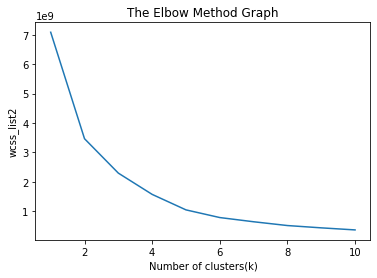

In [35]:
from sklearn.cluster import KMeans
# we have created the wcss list
# wcss is a interia 
wcss_list2=[] # Initializing the list for the value of WCSS
#hutte
# kmeans.inertia_: sum of squared distance
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(q)
    wcss_list2.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list2)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list2')
plt.show()

In [36]:
# This is the Elbow point
from kneed import KneeLocator
k5=KneeLocator(range(1,11),wcss_list2,curve='convex',direction='decreasing')
k5.elbow

3

In [37]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=1)
# We are going to use the fit predict method that return for each observation which cluster
y_predict5=kmeans.fit_predict(s)
y_predict5

array([0, 0, 0, ..., 0, 0, 0])

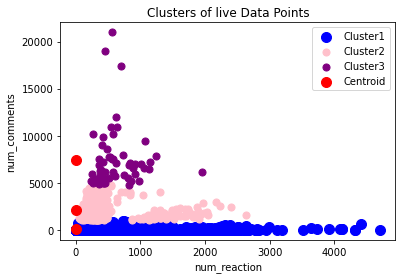

In [38]:
# Here, we plot the Cluster and Centroid 
plt.scatter(q[y_predict5==0,0],q[y_predict5==0,1],s=100,c='blue',label='Cluster1')
plt.scatter(q[y_predict5==1,0],q[y_predict5==1,1],s=50,c='pink',label='Cluster2')
plt.scatter(q[y_predict5==2,0],q[y_predict5==2,1],s=50,c='purple',label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroid')
plt.title('Clusters of live Data Points')
plt.xlabel('num_reaction')
plt.ylabel('num_comments')
plt.legend()
plt.show()